<a href="https://colab.research.google.com/github/abdnass/Churn_Analysis/blob/main/Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import the data

In [ ]:
path = '/content/sample_data/churn_all.csv'
df = pd.read_csv(path)
# View the first 5 rows of our data
df.head()

,state,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn
0,KS,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# the columns of the data
df.columns

Index(['state', 'area_code', 'phone_number', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   area_code                      5000 non-null   int64  
 2   phone_number                   5000 non-null   object 
 3   international_plan             5000 non-null   object 
 4   voice_mail_plan                5000 non-null   object 
 5   number_vmail_messages          5000 non-null   int64  
 6   total_day_minutes              5000 non-null   float64
 7   total_day_calls                5000 non-null   int64  
 8   total_day_charge               5000 non-null   float64
 9   total_eve_minutes              5000 non-null   float64
 10  total_eve_calls                5000 non-null   int64  
 11  total_eve_charge               5000 non-null   float64
 12  total_night_minutes            5000 non-null   f

From the data info above, we can see that we do not have any missing data.

### Exploratory Data Analysis
Now we are going to explore the dataset to find relationships that might explain why some of the customers churn.

In [ ]:
# convert the Churn feature to int64
df['Churn'] = df['Churn'].astype('int64')

In [ ]:
# show basic statistical characteristic for each numerical feature
df.describe()

,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,436.911400,7.755200,180.288900,119.834000,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400
std,42.209182,13.546393,53.894699,442.739543,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469
min,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,408.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,415.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,415.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,510.000000,52.000000,351.500000,9999.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


From the description table we can see that the mean of the churn is 14.1% which is quite bad for a company in areas like:
- Losing that many customers regularly can seriously hurt recurring income.
- If the company is spending a lot to bring customers in, but they're leaving quickly, that’s a costly imbalance.
- It may indicate gaps in service quality, satisfaction, or even competitive pressure.

The things that we could consider here are:
- The services used by the customers.
- Could the amount they are paying be indicative to churn.

**How much on average does the churned users spend on the phone in minutes during  daytime, evening and night time?**


In [ ]:
features = ['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes']
df.groupby('Churn')[features].mean()

,total_day_minutes,total_eve_minutes,total_night_minutes,total_intl_minutes
Churn,,,,
0,175.746564,198.805031,199.455113,10.190869
1,207.870580,211.757850,206.078218,10.692362


Let us create a new feature 'total_charge' as the sum of the day, evening, night and intel charge

In [ ]:
df['total_charge'] = df['total_day_charge']
+ df['total_eve_charge']
+df['total_night_charge']
+df['total_intl_charge']
df.groupby('Churn')['total_charge'].mean()

,total_charge
Churn,
False,29.877494
True,35.338416


**We can see that the customers that pay more tend to churn on average.**

<Axes: xlabel='Churn', ylabel='count'>

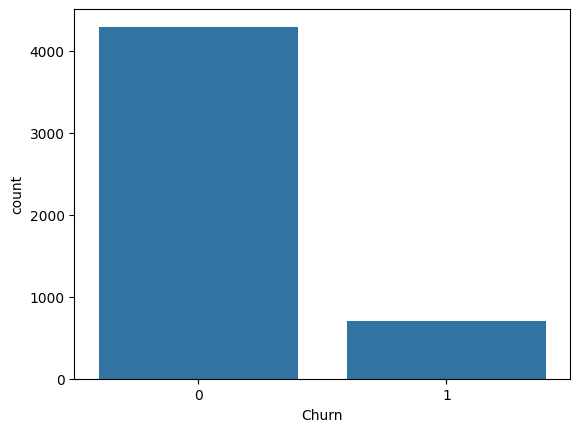

In [ ]:
sns.countplot(data = df, x = 'Churn')

([<matplotlib.patches.Wedge at 0x7e53baa047d0>,
 [Text(-0.9932402092841811, 0.47273024724584367, 'Stayed'),
  Text(0.9932403633191946, -0.4727299236070789, 'Churned')])

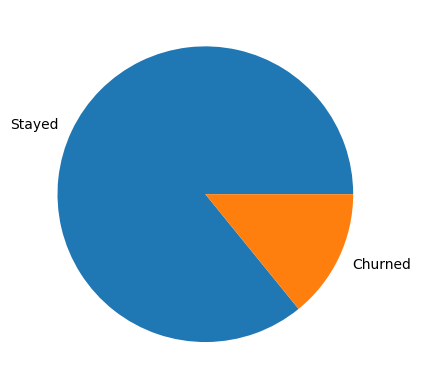

In [ ]:
plt.pie(df['Churn'].value_counts(), labels = ['Stayed', 'Churned'])

This chart shows that most only small part of the clients canceled (but still this number is bad for the company) which shows that the data is not balanced, This implies that we might want to penalize our model's error in predicting the churned class.

**Plot the distributions of the numerical features.**

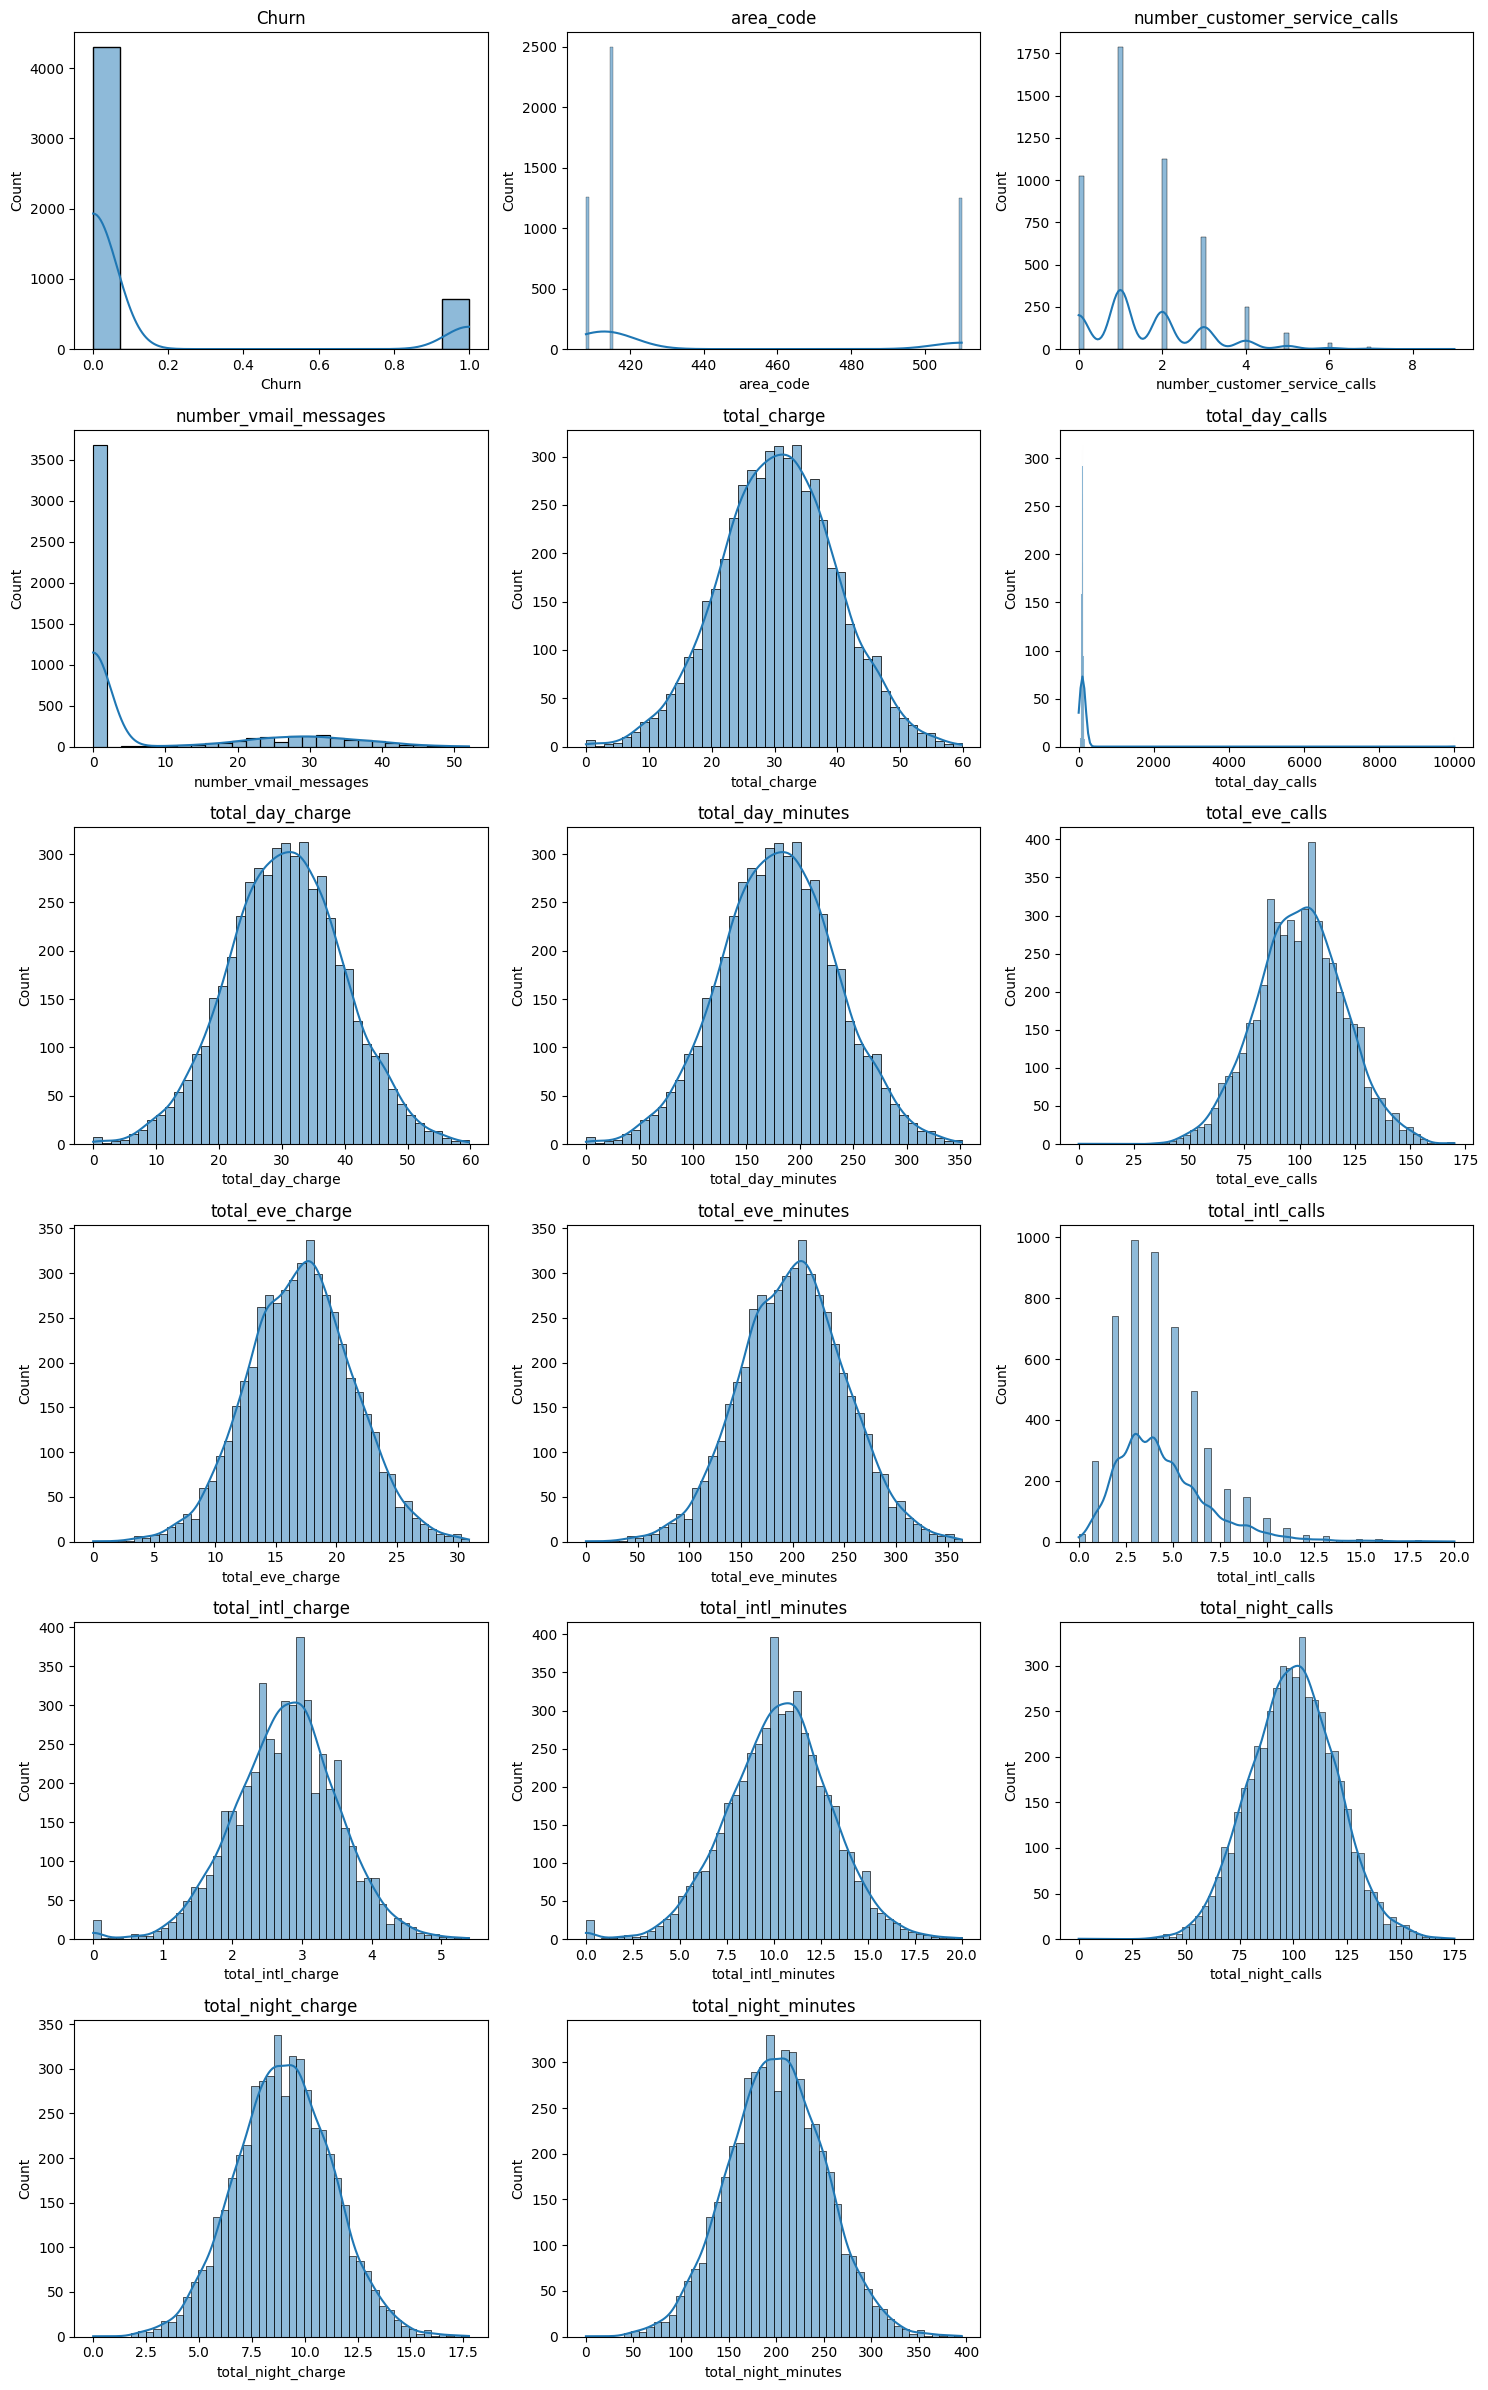

In [ ]:
categorical_features = df.dtypes[df.dtypes == 'object'].index.tolist()
numerical_features = df.columns.difference(categorical_features)
ncols = 3
nrows = (ncols -1 + len(numerical_features))//ncols
_, ax = plt.subplots(ncols = ncols, nrows = nrows, figsize = (15,4*nrows))
ax = ax.flatten()
for i, feature in enumerate(numerical_features):
  sns.histplot(df[feature], ax = ax[i], kde = True)
  ax[i].set_title(feature)

# hide any unused subplot
for j in range(len(numerical_features), len(ax)):
    ax[j].set_visible(False)
plt.tight_layout()
plt.show()


**We notice that the data distribution is not that bad, except for the features 'total_day_calls' that looks like it has some extreme outliers.**

Let us fix this issue.\
Since we can tell that the distribution of this feature is normal we are goint to use the standard deviation method (drop the data points that are above mean + 3σ). IQR method could be used too.

In [ ]:
def drop_outliers(df, feature):
  std = df[feature].std()
  mean = df[feature].mean()
  df.drop(index = df[df[feature] > (mean + 3*std)].index, inplace = True)
  return df

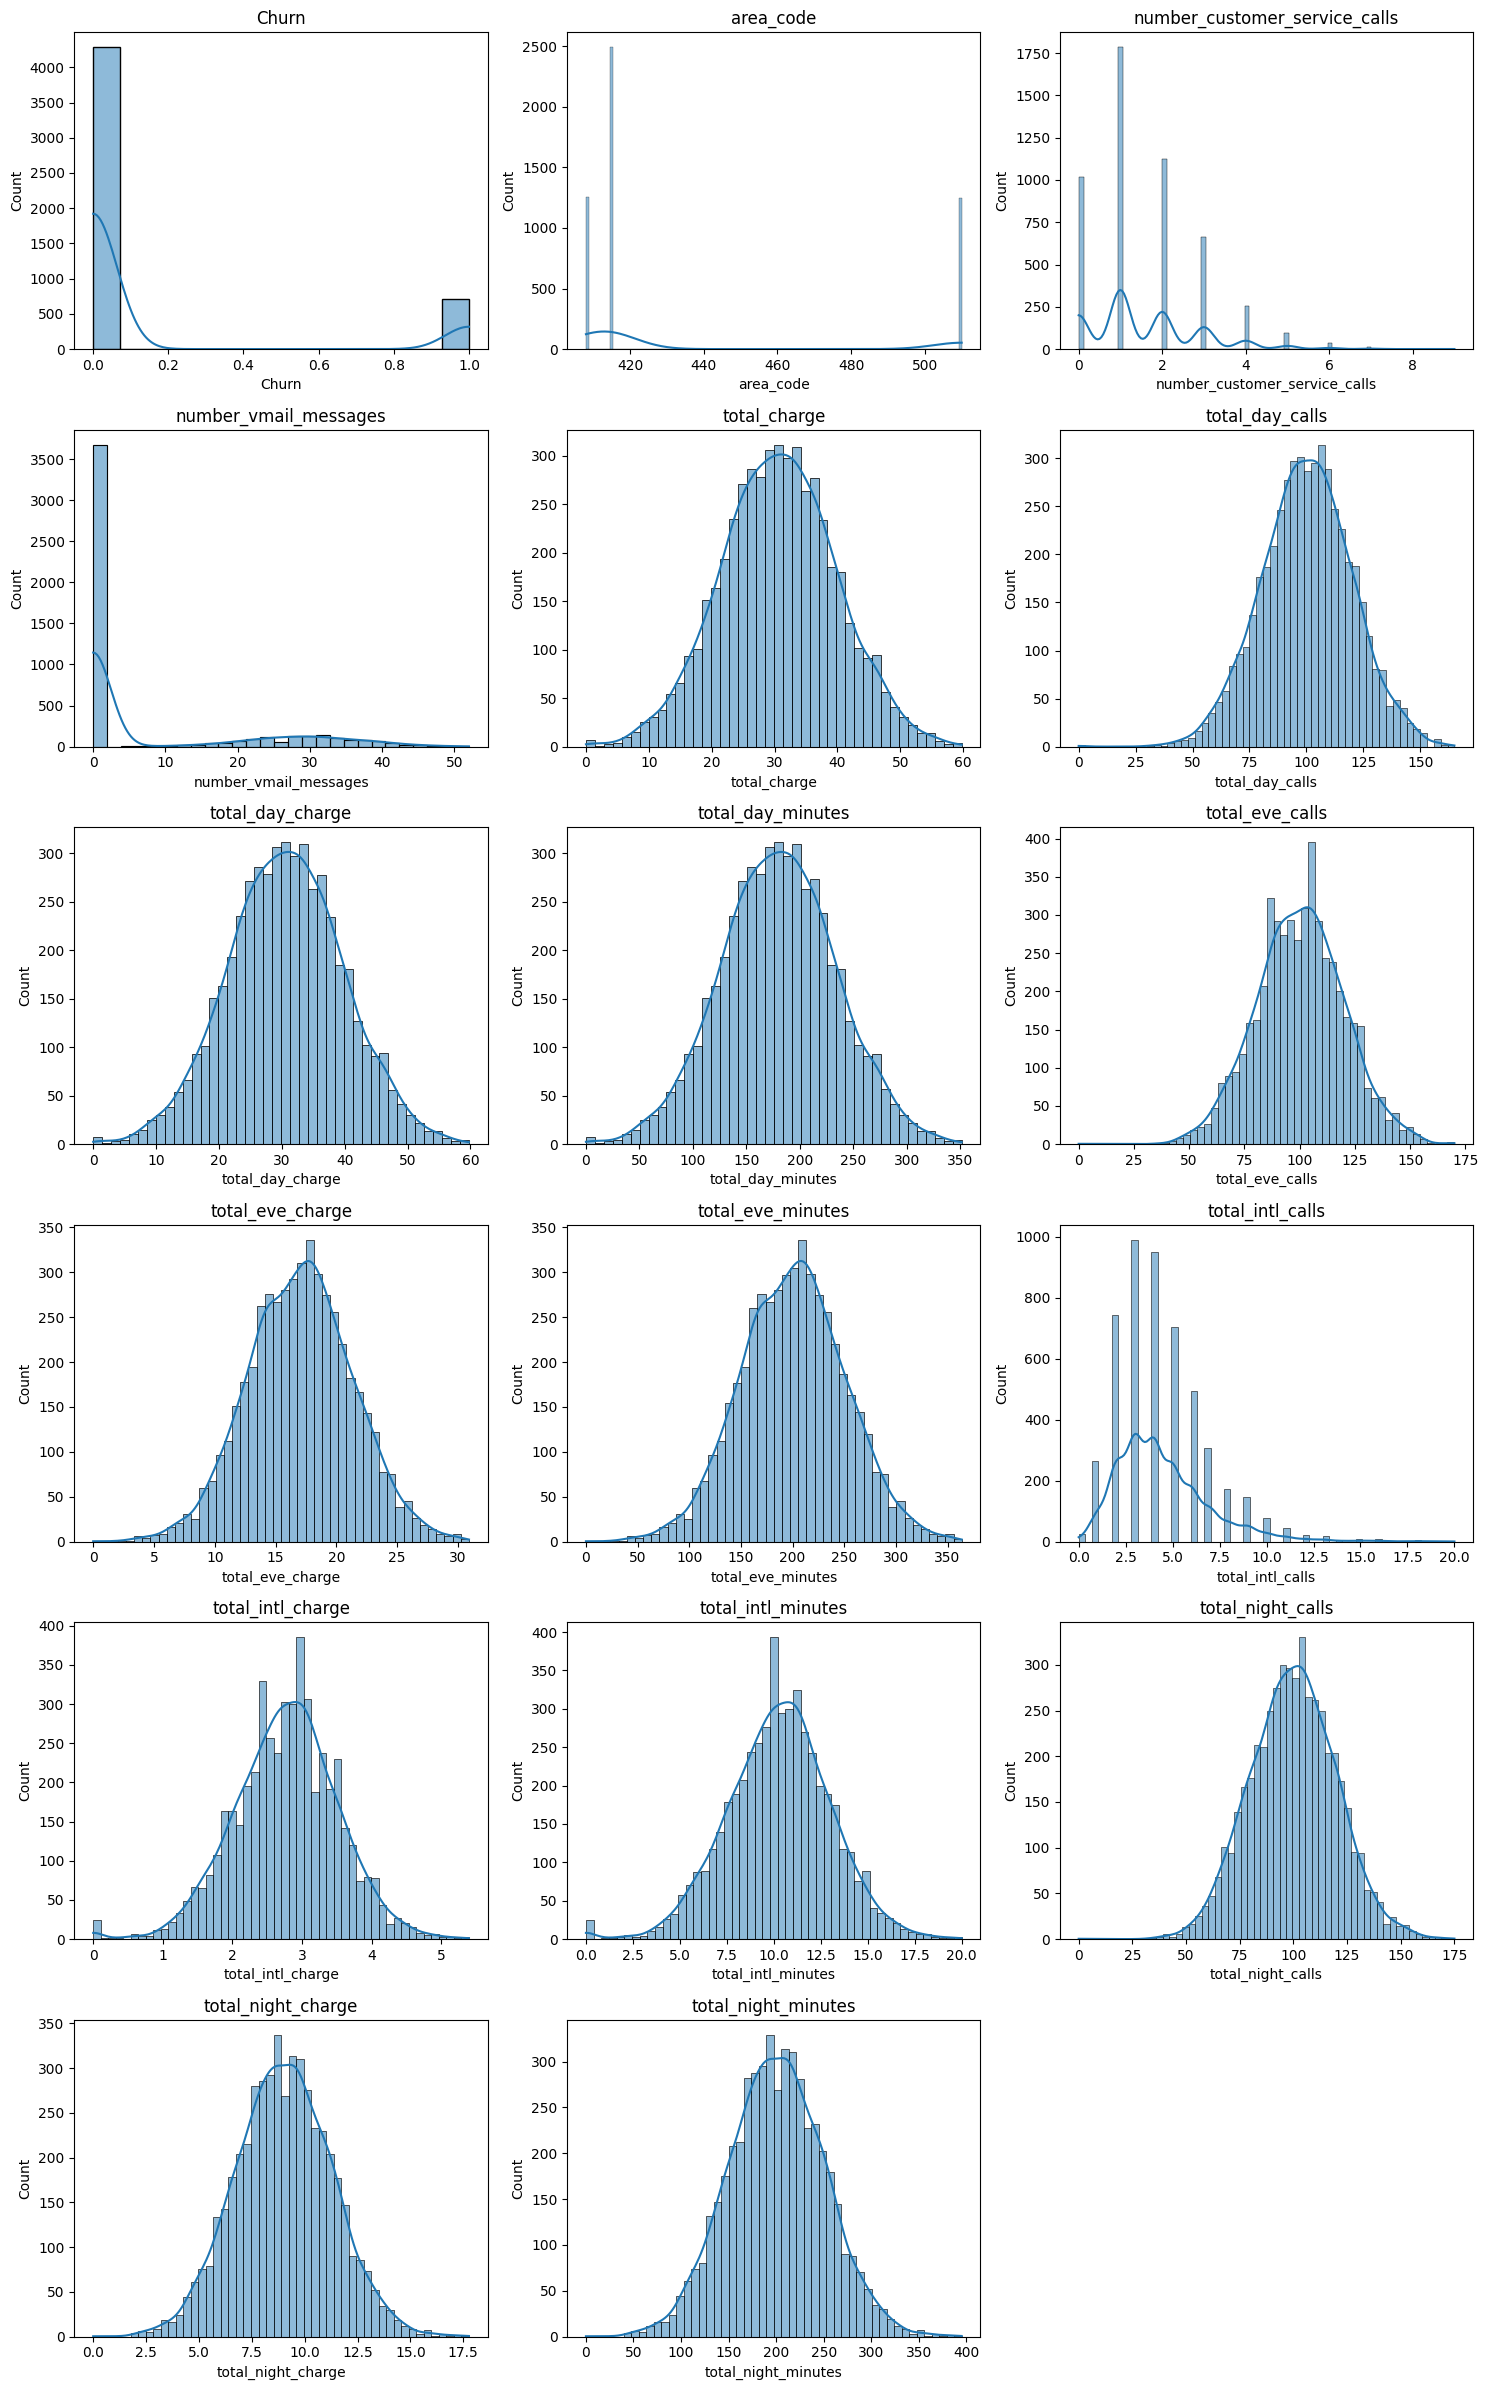

In [ ]:
df = drop_outliers(df, 'total_day_calls')
ncols = 3
nrows = (ncols -1 + len(numerical_features))//ncols
_, ax = plt.subplots(ncols = ncols, nrows = nrows, figsize = (15,4*nrows))
ax = ax.flatten()
for i, feature in enumerate(numerical_features):
  sns.histplot(df[feature], ax = ax[i], kde = True)
  ax[i].set_title(feature)

# hide any unused subplot
for j in range(len(numerical_features), len(ax)):
    ax[j].set_visible(False)
plt.tight_layout()
plt.show()


###The correlation matrix for the numerical features.

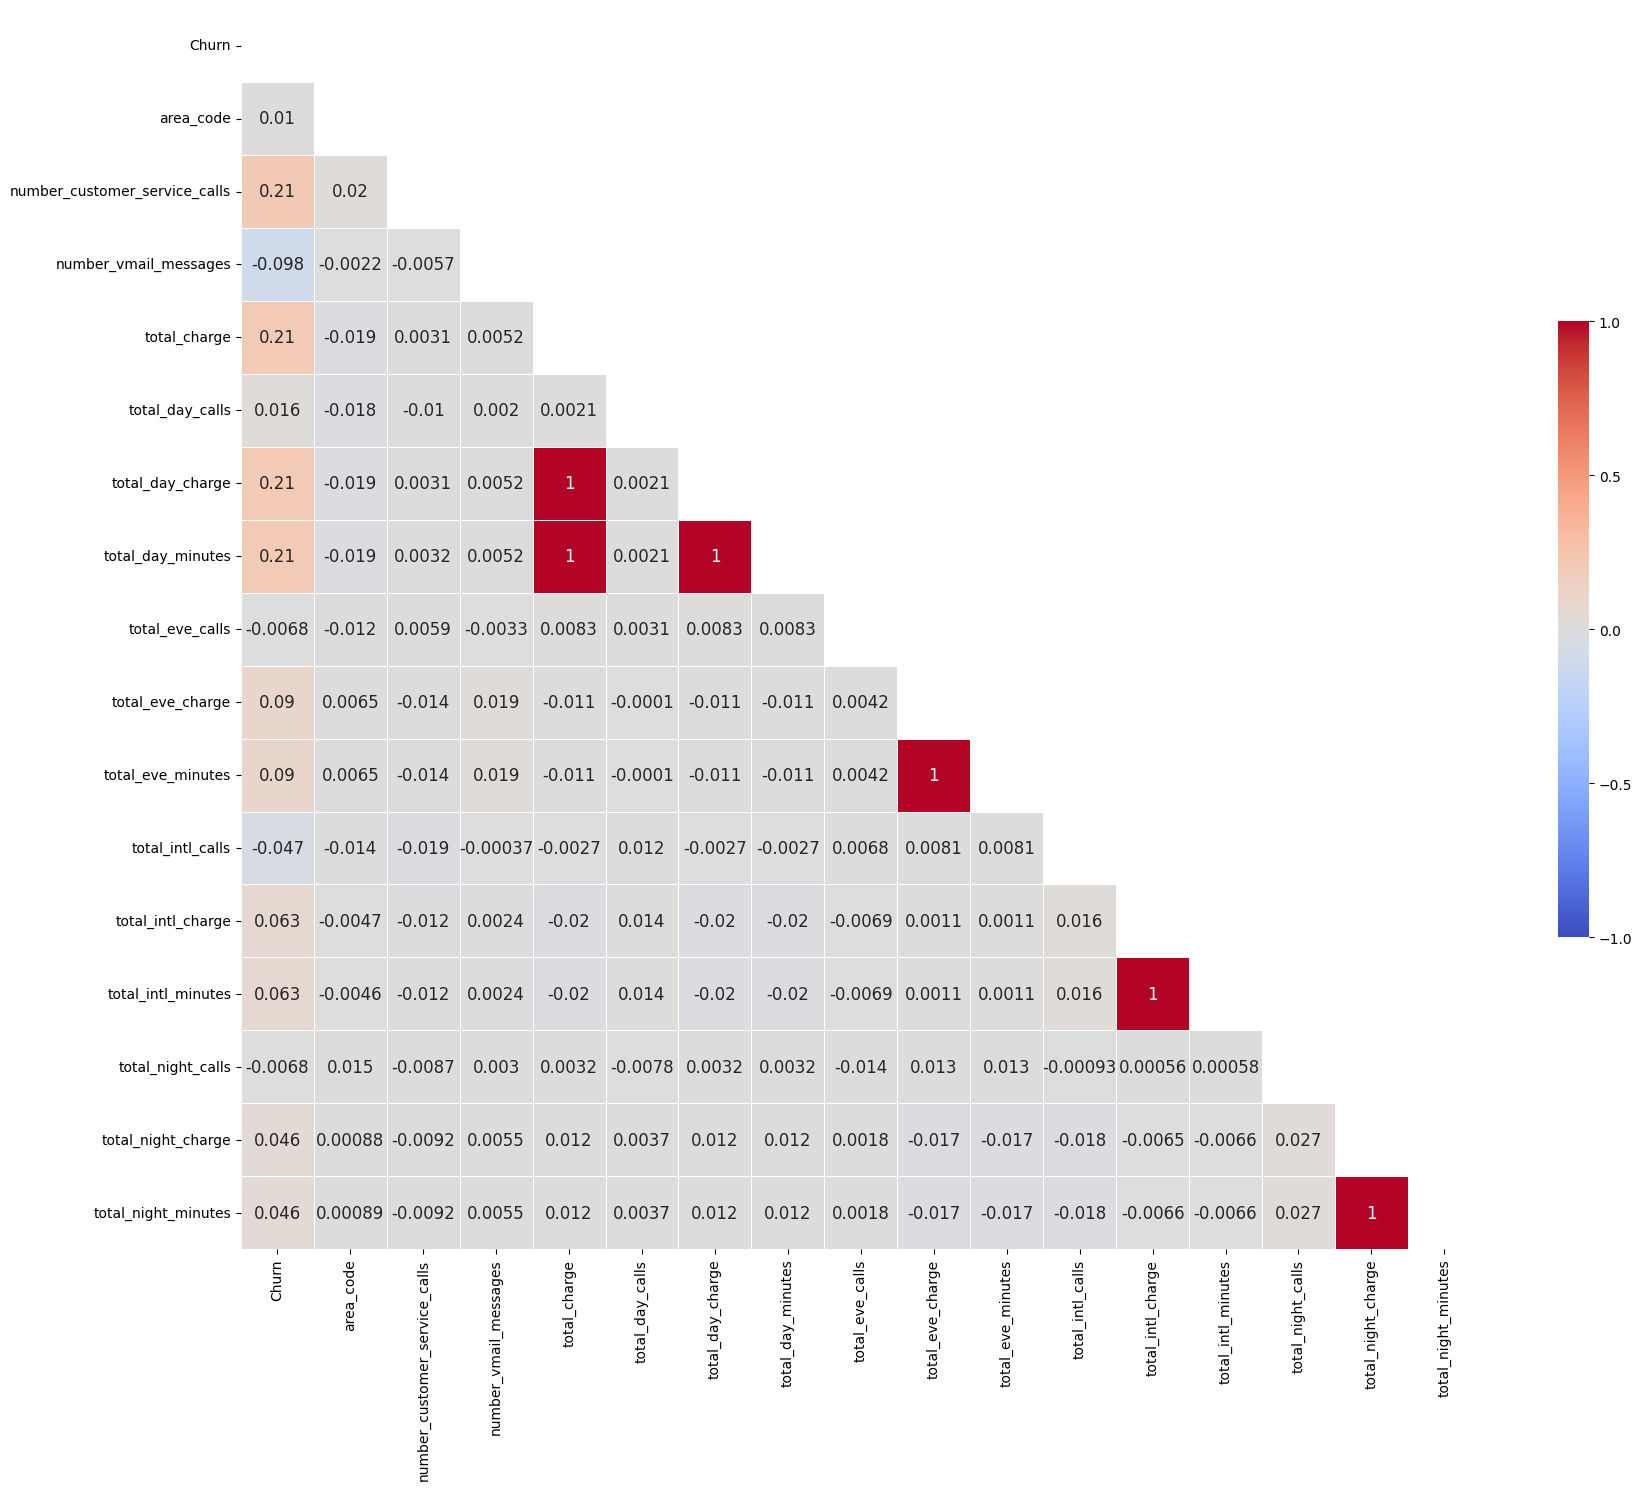

In [ ]:
Corr = df[numerical_features].corr(method = 'pearson')
mask = np.zeros_like(Corr, dtype = np.bool)
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(20,20))
heatmap = sns.heatmap(Corr,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
ax.set_yticklabels(Corr.columns, rotation = 0)
ax.set_xticklabels(Corr.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

From the correlation matrix we can see that 4 features such as total_night_charge that was calculated directly from total_night_minutes spent on the phone. Therefore, they could be droped as they will not have any additional information to our classification model.

In [ ]:
# We are going to also drop total_charge as we just added it before for analysis perpose.
# Drop also the area code as it has weak correlation.
# We drop the target 'Churn' too
numerical_features = list(set(numerical_features) - {'total_night_charge', 'total_intl_charge', 'total_eve_charge',
                                           'total_day_charge', 'total_charge',
                                                     'area_code', 'Churn'})


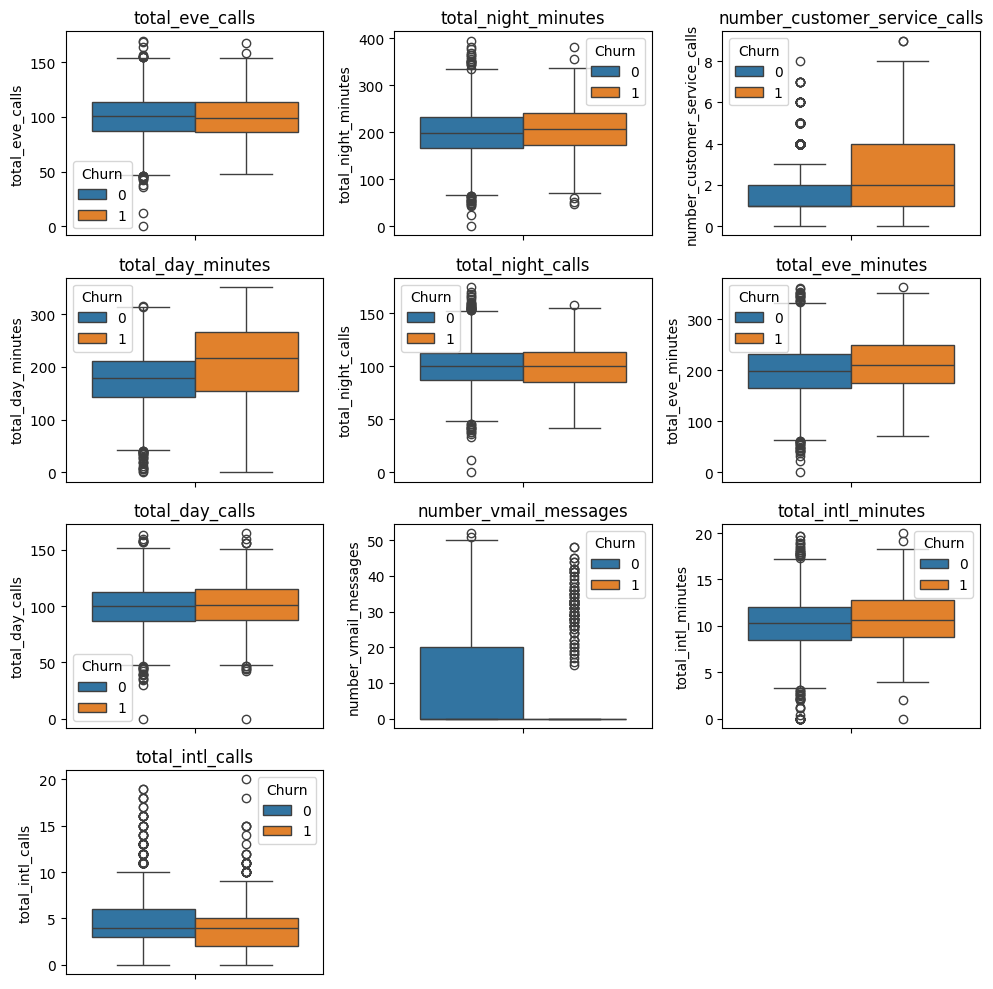

In [ ]:
ncols = 3
nrows = (ncols -1 + len(numerical_features))//ncols
_, ax = plt.subplots(ncols = ncols, nrows = nrows, figsize = (10,10))
ax = ax.flatten()
for i, feature in enumerate(numerical_features):
  sns.boxplot(data = df, y = feature, hue = 'Churn', ax = ax[i])
  ax[i].set_title(feature)

for j in range(len(numerical_features), len(ax)):
  ax[j].set_visible(False)

plt.tight_layout()
plt.show()

Couple of things that we can tell from the above plot:
- customers that churn are more active users of the communication services.
- Due to the discripancy in the distribution of some features, we can tell that features like total_day_minutes, num_vmail_messages and number_customer_service_calls are very important for our classification task.
We are going to verify this hypothesis later on.

**Going back to the first observation, It could be that the customers are not happy with the tariffs, so we could try to lower these tarifs to prevent churn.**

Let us look into the features international_plan and voice_mail_plan.

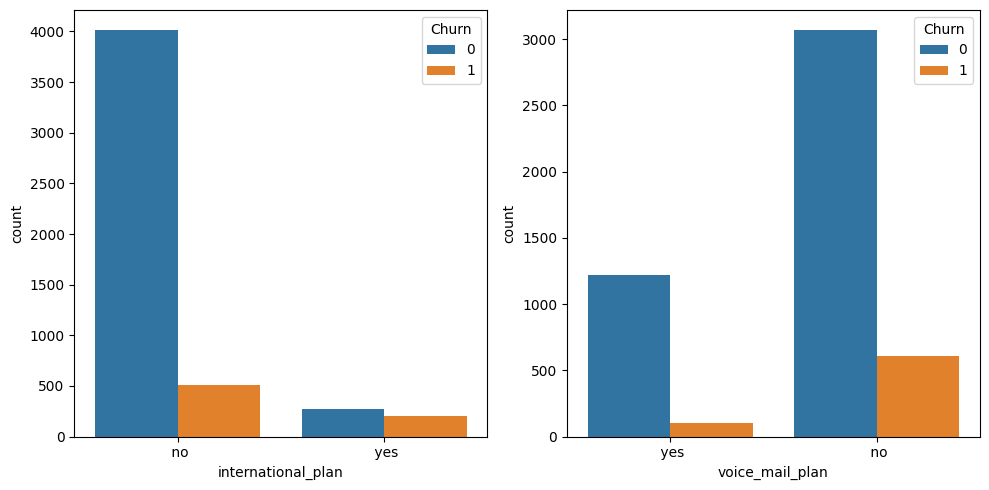

In [ ]:
_, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (10,5))
sns.countplot(data = df, x = 'international_plan', hue = 'Churn', ax = ax[0])
sns.countplot(data = df, x = 'voice_mail_plan', hue = 'Churn', ax = ax[1])
plt.tight_layout()
plt.show()


**Observation:** We can see that the rate of churn is much higher when the customers have an international plan, the same is not true for the voice_mail_plan.

##### The feature number_customer_service_calls have caught my attention, let us delve deep into the analysis of this feature.

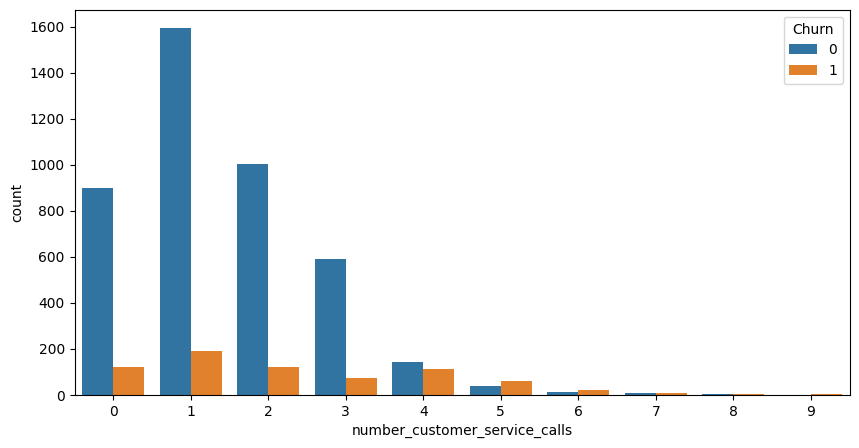

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = 'number_customer_service_calls', hue = 'Churn')
plt.show()

**Observation:** we can see that after the fourth customer service call the churn rate increases significantly.

In [ ]:
df.groupby('number_customer_service_calls')['Churn'].count()

,Churn
number_customer_service_calls,
0,1020
1,1784
2,1124
3,663
4,252
5,96
6,34
7,13
8,2


In [ ]:
df.groupby('number_customer_service_calls')['Churn'].agg(
    churn_rate='mean',
    total_customers='count',
    churned_customers='sum'
)

,churn_rate,total_customers,churned_customers
number_customer_service_calls,,,
0,0.118627,1020,121
1,0.106502,1784,190
2,0.108541,1124,122
3,0.110106,663,73
4,0.440476,252,111
5,0.604167,96,58
6,0.647059,34,22
7,0.538462,13,7
8,0.500000,2,1


**Observation:**The churn rate stating from the forth custom service is so high that more than half of the customers are churning.\
Let us look at the total_charge to determine whether or not the total charge is also causing this churing.

In [ ]:
df.groupby('number_customer_service_calls').agg(
    {'Churn':'mean',
    'total_charge':'mean'}
)

,Churn,total_charge
number_customer_service_calls,,
0,0.118627,30.671216
1,0.106502,30.682719
2,0.108541,30.232936
3,0.110106,31.004087
4,0.440476,31.506905
5,0.604167,30.787708
6,0.647059,26.876765
7,0.538462,30.451538
8,0.500000,30.650000


This table shows that maybe the churning is not because of the tariff.

#Model trainin and validation.

Since the features are normally distributed, the correlation is not high between the features and the data size is small the LDA model could be a very good choice.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
y = df['Churn']
numerical_features.extend(('international_plan', 'voice_mail_plan'))
features = numerical_features
drop_features = df.columns.difference(features)
X = df.drop(columns = drop_features)


In [ ]:
# simple encoding of the data
t = {' yes': 1, ' no': 0}
X['international_plan'] = X['international_plan'].map(t)
X['voice_mail_plan'] = X['voice_mail_plan'].map(t)

The following function train_validate_models splits trains and validates two models RandomForestClassifier and GradientBoostingClassifier using training data (70%) and validaition data (30%), and performs a weight penilization on the error of each model to address the imbalanced data. Then returns the Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC), the recall and the f1-score.

In [ ]:
def train_validate_models(X, y, test_size=0.3):
    """
    Simple function to train and validate both models with imbalance penalization
    """
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y
    )

    # Calculate class weights for imbalance penalization
    classes = np.unique(y_train)
    class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
    sample_weights = np.array([class_weights[1] if label == 1 else class_weights[0] for label in y_train])

    # models
    models = {
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42)
    }

    results = {}

    for name, model in models.items():
        print(f"\n{'-'*40}")
        print(f"Training {name}...")

        # Train with penalization
        model.fit(X_train, y_train, sample_weight=sample_weights)

        # Validate
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        roc_auc = roc_auc_score(y_test, y_pred_proba)

        print(f"ROC-AUC: {roc_auc:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

        results[name] = {
            'model': model,
            'roc_auc': roc_auc,
            'predictions': y_pred,
            'probabilities': y_pred_proba
        }

    return results

results = train_validate_models(X, y)


----------------------------------------
Training Gradient Boosting...
ROC-AUC: 0.9251

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       857
           1       0.67      0.85      0.75       141

    accuracy                           0.92       998
   macro avg       0.82      0.89      0.85       998
weighted avg       0.93      0.92      0.92       998


----------------------------------------
Training Random Forest...
ROC-AUC: 0.9324

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       857
           1       0.91      0.71      0.80       141

    accuracy                           0.95       998
   macro avg       0.93      0.85      0.88       998
weighted avg       0.95      0.95      0.95       998



We can improve the performance of these models by using cross validation, hyperparameter tuning and feature selection but in this case 93-94% ROC-AUC score is enough for a model to separate churners very well.

Now we are going to address the task of Identifying the top 500 customers to contact first to maximizing profitability and minimizing churn.\
This is a classical task that balances churn probabilities form our model (RandomForestClassifier) with customer value (which we are going to take as the total_charges).

The following function computes the expected profit from every customer as (Chrurn probability * total charge), and then sorts then sorts it in a descending way.

In [ ]:
def top_500_customers(df, model, intervention_cost=30, top_n=500):

    df['churn_probability'] = model.predict_proba(X)[:, 1]


    # Expected Profit = (Churn Probability × total_charge)
    df['expected_profit'] = (df['churn_probability'] * df['total_charge'])

    # 3. Filter only high_risk, high-value customers (positive expected profit)
    profitable_candidates = df[df['expected_profit'] > 0]

    # 4. Sort by expected profit (descending)
    prioritized_customers = profitable_candidates.sort_values('expected_profit', ascending=False)


    return prioritized_customers.head(top_n)

model = results['Random Forest']['model']

top_500_customers = top_500_customers(df, model, intervention_cost=30, top_n=500)

In [ ]:
top_500_customers[['phone_number', 'churn_probability', 'expected_profit']]

,phone_number,churn_probability,expected_profit
985,345-9140,0.99,58.3704
365,343-5709,0.95,56.6580
3993,406-2551,0.92,54.9792
605,373-2053,0.95,54.1880
2594,348-1163,0.92,54.0040
...,...,...,...
3554,411-4648,0.95,20.9665
2468,332-6139,0.84,20.9664
3746,338-9350,0.62,20.9312
244,335-1697,0.62,20.9250


**How would this strategy deffer from randomly contacting customers?

In [ ]:
top_500_customers['Churn'].value_counts()/500

,count
Churn,
True,0.988
False,0.012


In [ ]:
random_500 = df.sample(500)
random_500['Churn'].value_counts()/500

,count
Churn,
False,0.888
True,0.112


The strategy contacts 98% likely to churn customers  compaired to 1.2% for a random strategy.\
The table bellow highlights the main advantages of this strategy compaired to random choice.

In this section I am going to answer the 4 questions asked in the pdf file.


1.   The customers that are likely to churn are as follows: At first it looked like the tariffs were the reason for the churn. However, as we firther analysed the data we found out that it might actually be bad custom service and bad customer relationship management.
2.   This task has been done in the machine learning prediction section above.
3.   the top 500 customers to contact first to maximize profit and minimize churn are given in the list 'top_500_customers'.
4.   The above strategy differs from randomly contacting customers as follows:

| Metric | Data-Driven Prioritization | Random Contact |
|--------|---------------------------|----------------|
| **Churn Rate in Contacted Group** | 92-99% likely to churn | 0.8-1.2% likely to churn |
| **total value** | 20201 revenue | Average revenue  |
| **Prevention Success Rate** | **High** (targeting actual leavers) | **Low** (mostly contacting loyal customers)
| **Resource Efficiency** | **Optimal** (focus on real risks) | **Wasteful** (spread thin) |
| **False Positive Rate** | **Low** (few loyal customers contacted) | **High** (many loyal customers contacted) |
| **Business Intelligence** | **Rich insights** (why customers leave) | **No insights** |
| **Scalability** | **Improves with more data** | **Static effectiveness** |



**Thank you😀**.
